In [1]:
import logging
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.INFO)

In [4]:
import downloader

In [5]:
import download_datasets

In [6]:
dfs=download_datasets.get_datasets()

2022-07-17 16:52:05,396 INFO root processing: data_sources/EuropeanMeanTemperatureSinceRomanTime_EuroMed2k.toml
/Users/dsc/gith/domschl/indrajala/python_indrajala/examples/importers/downloader.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(io.StringIO(data), sep=sep)
2022-07-17 16:52:05,408 INFO root processing: data_sources/WikipediaGeologicTimeScales.toml
2022-07-17 16:52:05,540 INFO root processing: data_sources/DWDGermanJuneMeanTemperature.toml
2022-07-17 16:52:05,543 INFO root processing: data_sources/11000yearsunspotnumber.toml
2022-07-17 16:52:05,547 INFO root processing: data_sources/DWDGermanAugustMeanTemperature.toml
2022-07-17 16:52:05,550 INFO root processing: data_sources/DWDGermanJulyMeanTemperature.toml
2022-07-17 16:52:05,553 INFO root processing: data_s

In [7]:
dfs.keys()

dict_keys(['euromed2k', 'geologictimescale', 'germany_june_meantemp', 'sunspots11000yrs', 'germany_august_meantemp', 'germany_july_meantemp', 'sunspotsmonthlymean1749', 'gisp2icecoretemp', 'gisp2icecoreaccum'])

In [8]:
dfs['sunspotsmonthlymean1749']

,Year,Month,FracYear,MonthlyMean,StdDev,ObsCount
0,1749,1,1749.042,96.7,NaN,NaN
1,1749,2,1749.123,104.3,NaN,NaN
2,1749,3,1749.204,116.7,NaN,NaN
3,1749,4,1749.288,92.8,NaN,NaN
4,1749,5,1749.371,141.7,NaN,NaN
...,...,...,...,...,...,...
3277,2022,2,2022.122,59.7,13.1,1044.0
3278,2022,3,2022.204,78.5,13.9,1277.0
3279,2022,4,2022.286,84.1,15.2,1237.0
3280,2022,5,2022.371,96.5,16.0,1250.0


In [42]:
em2k=dfs['euromed2k'].to_numpy()
gjmt6=dfs['germany_june_meantemp'].to_numpy()
gjmt7=dfs['germany_july_meantemp'].to_numpy()
gjmt8=dfs['germany_august_meantemp'].to_numpy()
sunsp=dfs['sunspots11000yrs'].to_numpy()
sunsp1749=dfs['sunspotsmonthlymean1749'].to_numpy()

In [43]:
sunsp[:,0]=1950-sunsp[:,0]

In [44]:
gjmt=(gjmt6[:-1,:]+gjmt7+gjmt8)/3.0

In [45]:
np.mean(gjmt[:,2])

17.553569739952717

In [46]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [47]:
gjmean=np.mean(gjmt[:,2])

In [48]:
win=10
em2kmat=moving_average(em2k[:,1],2*win+1)
gjmtmat=moving_average(gjmt[:,2]-gjmean,2*win+1)

In [68]:
sunma=moving_average(sunsp[:,1],2*win+1)
sunman=moving_average(sunsp1749[:,3],20*win+1)

In [69]:
sunman

array([76.14427861, 75.77910448, 75.3761194 , ..., 39.60099502,
       39.7800995 , 39.94577114])

In [64]:
sunman.shape, sunsp1749.shape

((3262,), (3282, 6))

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]  # inch! :-/

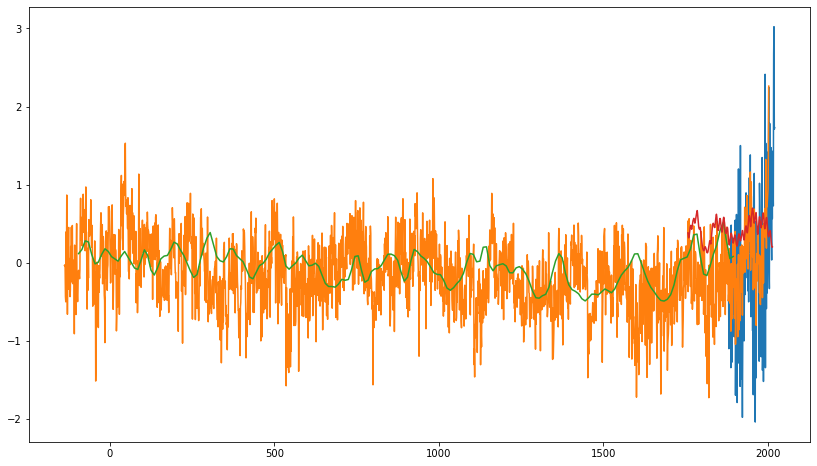

In [70]:
plt.plot(gjmt[:,0],gjmt[:,2]-gjmean)
plt.plot(em2k[:,0],em2k[:,1])
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/60-0.4)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200)

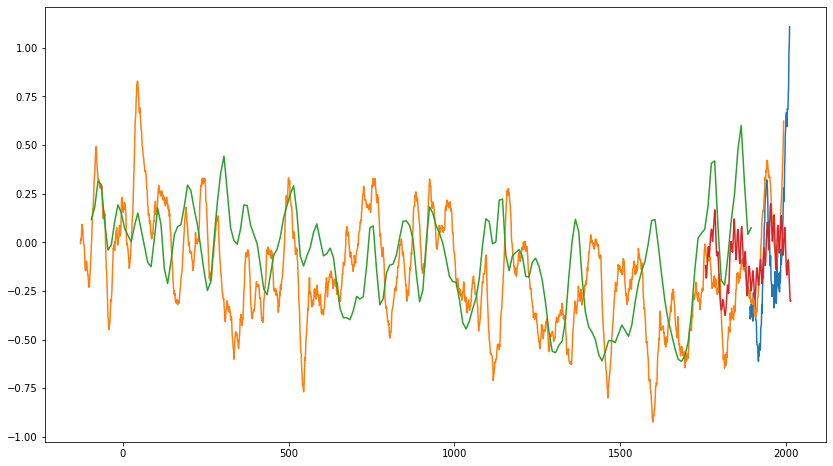

In [78]:
# plt.plot(dfnp[:,0],dfnp[:,1])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(em2k[win:-win,0],em2kmat)
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/50-0.5) # sunma[-200:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

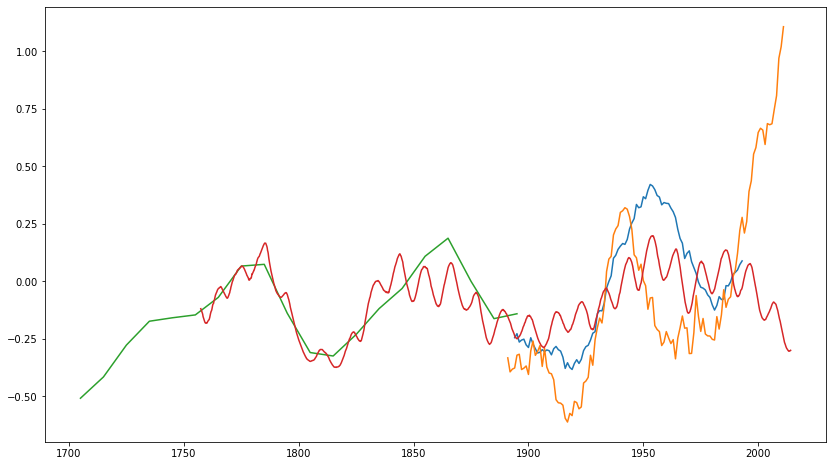

In [80]:
plt.plot(em2k[-120+win:-win,0],em2kmat[-120+win:-win])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(sunsp[-20:,0],sunsp[-20:,1]/80-0.5) # sunma[-20:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

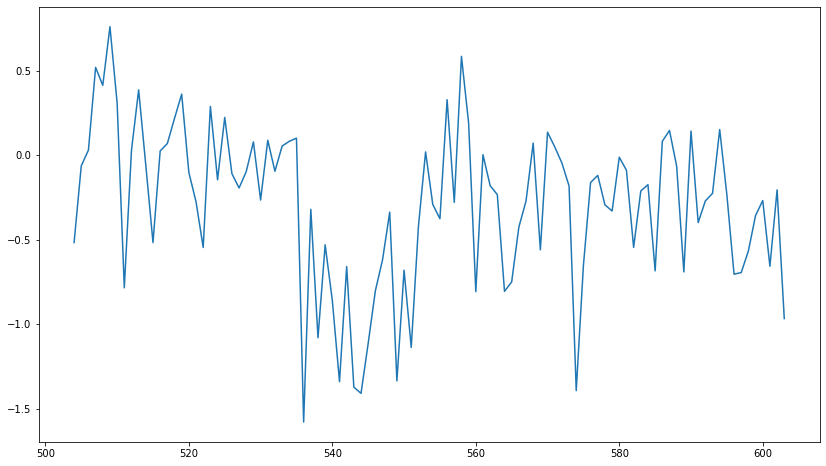

In [40]:
a=-1500
b=-1400
plt.plot(em2k[a:b,0],em2k[a:b,1])
plt.plot(gjmt[a:b,0],gjmtmat[a-win:b-win])
